In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Reading data
df=pd.read_csv(r"C:\Users\hkmis\Downloads\aug_train.csv")

In [4]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
df_obj=df[df.dtypes[df.dtypes=='object'].index]

In [6]:
df_obj.describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [7]:
#Checking Null values
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [9]:
for i in df:
    print(df[i].value_counts())

8949     1
10660    1
30726    1
18507    1
31273    1
        ..
11547    1
32067    1
14356    1
18051    1
23834    1
Name: enrollee_id, Length: 19158, dtype: int64
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Pri

In [10]:
#Filling missing values
for i in df:
    df[i]=df[i].fillna(df[i].mode()[0])

In [11]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [12]:
for i in df:
    if type(df[i]=='object'):
        print(df[i].value_counts())

8949     1
10660    1
30726    1
18507    1
31273    1
        ..
11547    1
32067    1
14356    1
18051    1
23834    1
Name: enrollee_id, Length: 19158, dtype: int64
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64
Male      17729
Female     1238
Other       191
Name: gender, dtype: int64
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Pri

In [13]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,50-99,Pvt Ltd,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


<AxesSubplot:>

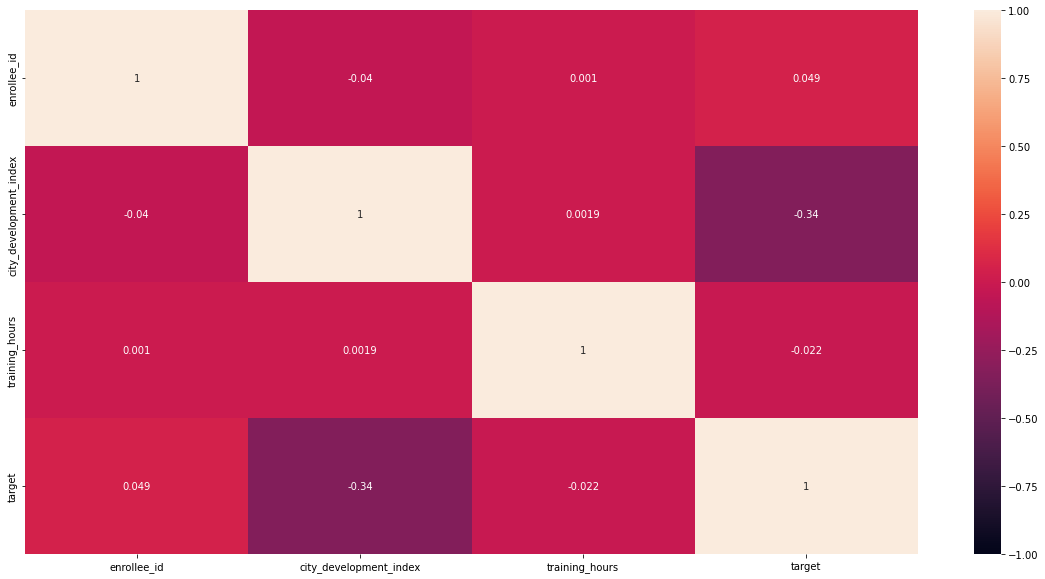

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

In [15]:
#We will remove the columns which have no use/less correlation as per the above
df_new=df.drop(['enrollee_id','training_hours'],axis=1)

In [16]:
df_new.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,0.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,0.0


<AxesSubplot:xlabel='major_discipline', ylabel='count'>

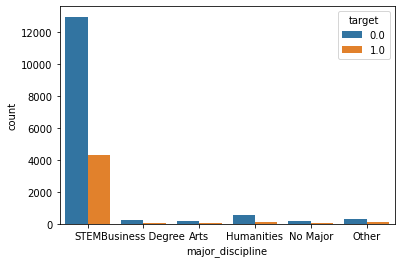

In [17]:
#Analyzing with the help of plot that the ratio of people looking for change according to 'major_discipline'
sns.countplot(x='major_discipline',data=df_new,hue='target')

<AxesSubplot:xlabel='experience', ylabel='count'>

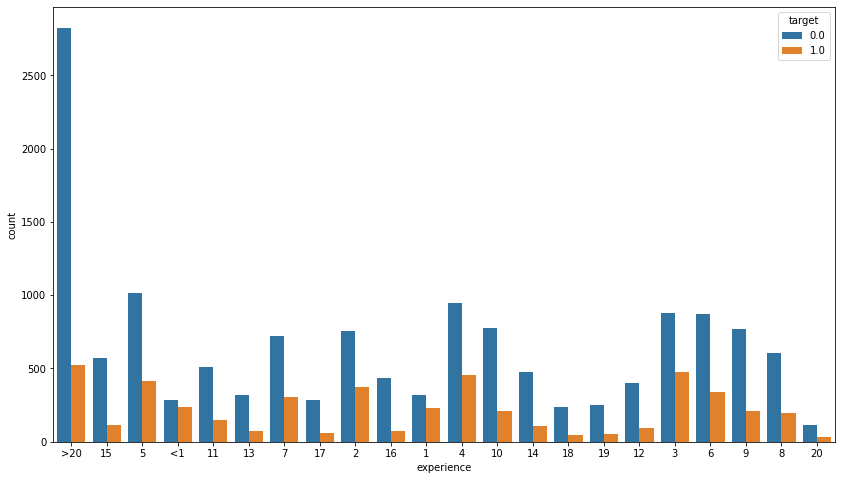

In [18]:
#Analyzing with the help of plot that the ratio of people looking for change according to 'experience'
plt.figure(figsize=(14,8))
sns.countplot(x='experience',hue='target',data=df_new)

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

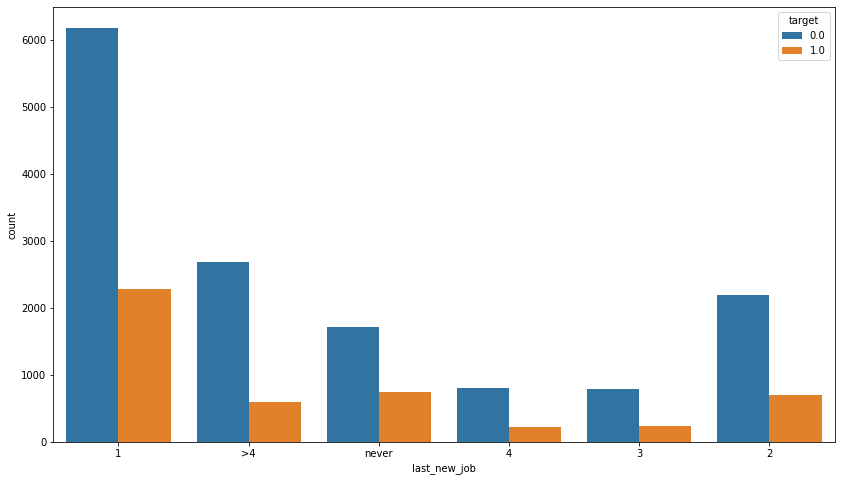

In [19]:
#Analyzing with the help of plot that the ratio of people looking for change according to 'last_new_job'
plt.figure(figsize=(14,8))
sns.countplot(x='last_new_job',hue='target',data=df_new)

<AxesSubplot:xlabel='company_size', ylabel='count'>

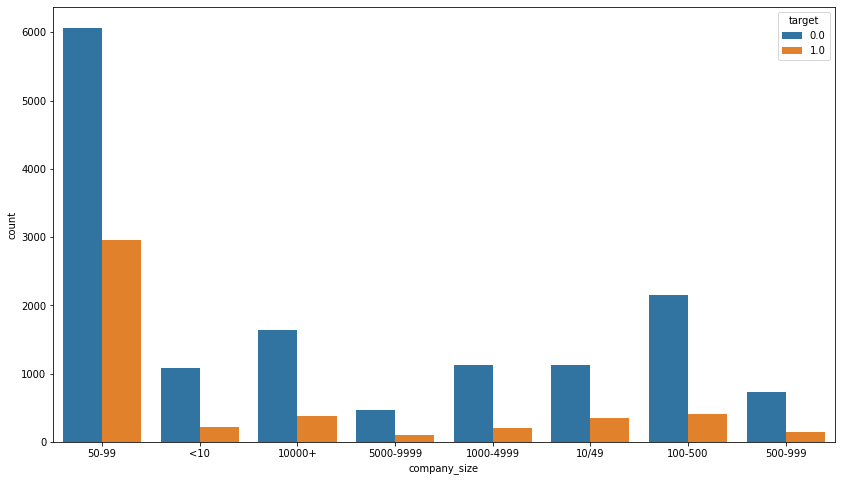

In [20]:
#Analyzing with the help of plot that the ratio of people looking for change according to 'company_size'
plt.figure(figsize=(14,8))
sns.countplot(x='company_size',hue='target',data=df_new)

<AxesSubplot:xlabel='company_type', ylabel='count'>

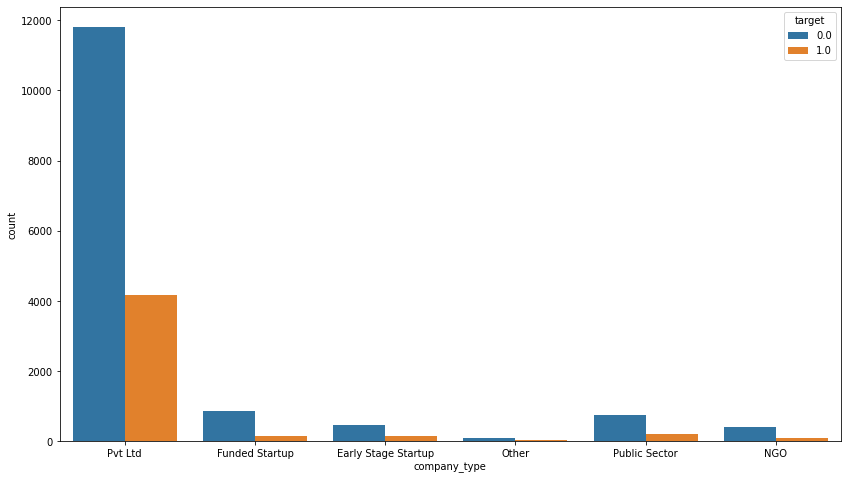

In [21]:
#Analyzing with the help of plot that the ratio of people looking for change according to 'company_type'
plt.figure(figsize=(14,8))
sns.countplot(x='company_type',hue='target',data=df_new)

In [22]:
#Conclusion from above plots:

#1.More people who are looking for change is working in small size companies although the data is imbalanced.
#2.People having experience between 1-11 yrs are majorly looking for change with an exception of 20 yrs as well
#3.Most the people in the feature discipline belongs to STEM so nothing informative from that.

In [23]:
df_new.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,0.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,0.0


In [24]:
df_new=df_new.drop(['city'],axis=1)

In [25]:
#Some replacement
df_new['experience']=df_new['experience'].replace('>20','21')
df_new['experience']=df_new['experience'].replace('<1','0')
df_new['last_new_job']=df_new['last_new_job'].replace('>4','5')
df_new['last_new_job']=df_new['last_new_job'].replace('never','0')

In [26]:
df_new.head(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,1,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,0.0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,0.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,50-99,Pvt Ltd,0,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,0.0
5,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,50-99,Pvt Ltd,1,1.0
6,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,0.0
7,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,5,1.0
8,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,1.0
9,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,5,0.0


In [31]:
X=df_new.drop('target',axis=1)
y=df_new['target']

In [32]:
X.shape,y.shape

((19158, 10), (19158,))

In [33]:
#Handling of categorical values
X=pd.get_dummies(X)

In [34]:
X.head()

,city_development_index,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_5
0,0.920,0,1,0,1,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
1,0.776,0,1,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0.624,0,1,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0.789,0,1,0,0,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,0.767,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
#Handling Imbalance data
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X,y)

In [36]:
y_sm.value_counts()

1.0    14381
0.0    14381
Name: target, dtype: int64

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm,test_size=0.20,random_state=42)

In [82]:
Log_model=LogisticRegression()

In [83]:
Log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
lm_pred=Log_model.predict(X_test)

In [89]:
sc=Log_model.score(X_test,y_test)
sc

0.7915869980879541

In [86]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report

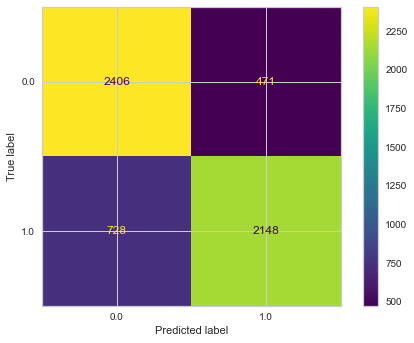

In [87]:
plot_confusion_matrix(Log_model,X_test,y_test)

In [78]:
print(classification_report(y_test,lm_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80      2877
         1.0       0.82      0.75      0.78      2876

    accuracy                           0.79      5753
   macro avg       0.79      0.79      0.79      5753
weighted avg       0.79      0.79      0.79      5753



In [90]:
print("Accuracy score for the model is",sc)

Accuracy score for the model is 0.7915869980879541


In [27]:
#Just explored different models score with Pycaret
from pycaret.classification import *

In [28]:
model=setup(data=df_new,target="target")

,Description,Value
0,session_id,4446
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(19158, 11)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7854,0.7888,0.4324,0.5872,0.4979,0.3654,0.3724,0.2720
lightgbm,Light Gradient Boosting Machine,0.7850,0.7863,0.4639,0.5791,0.5148,0.3789,0.3830,0.0580
ada,Ada Boost Classifier,0.7777,0.7864,0.3020,0.5963,0.4005,0.2816,0.3064,0.1130
lda,Linear Discriminant Analysis,0.7732,0.7625,0.3381,0.5662,0.4229,0.2929,0.3082,0.0560
ridge,Ridge Classifier,0.7719,0.0000,0.2571,0.5831,0.3564,0.2424,0.2727,0.0300
lr,Logistic Regression,0.7711,0.7639,0.2677,0.5748,0.3648,0.2473,0.2744,0.8930
rf,Random Forest Classifier,0.7590,0.7374,0.3963,0.5143,0.4471,0.2964,0.3008,0.3010
dummy,Dummy Classifier,0.7541,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260
svm,SVM - Linear Kernel,0.7503,0.0000,0.4158,0.5288,0.4340,0.2873,0.3048,0.1140
et,Extra Trees Classifier,0.7421,0.6935,0.3639,0.4700,0.4093,0.2481,0.2518,0.3410
